<a href="https://colab.research.google.com/github/MuthomiTed/Determining-Impact-of-Ageing-on-Adult-Lifestyle/blob/master/Project_2019_07_Python_SQL_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'black'> INDEPENDENT PROJECT 
 

## <font color = 'brown'> Project Description

## <font color = 'green'> Importing Libraries

In [0]:
import pandas as pd

import numpy as np

import csv

import sqlite3

from sqlalchemy import create_engine



## <font color = 'green'> Importing Datasets

In [0]:
lifestyle = pd.read_csv('adult_lifestyle.csv')
lifestyle.tail(3)

,id,ison,isoa,siteord,popweight,popstd,sex,age,agegr10,agegr05,edu,marstat,livarr,ses,n50plus,fsize,prop50,prop50cat,q1000,q1001,q1002,q1003,q1004,q1005,q1006,q1007,q1008,q1009,q1010,q1011,q1012,q1013,q1014,q1015,q1016,q1017,q1018,q1019,q1021,q1022,...,q1032,q1033,q1034,q1035,q2001,q2002,q2003,q2004,q2005,q2006,q2007,q2008,q2009,q2010,WHODAS,WHODASi,WHOQOL,WHOQOLr,irthealth,vignset,q1101,q1102,q1103,q1104,q1105,q1106,q1107,q1108,q1109,q1110,q1111,q1112,q1113,q1114,q1115,q1116,q1117,q1118,q1119,q1120
43932,83405129,834,TZA,Ifakara-TZ,1.029,3.723,Male,62,60-69,60-64,Primary or <6years,In current partnership,Living with other,2nd quintile,3,20,0.150000,<25%,good,none,none,none,none,none,moderate,mild,mild,moderate,mild,none,none,severe,none,none,none,moderate,none,none,no,no,...,none,none,none,no,moderately,a little,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,good,happy,13.888889,86.111114,19,70.3125,69.519974,Vignette Set C,severe,moderate,none,none,none,none,mild,severe,mild,moderate,none,mild,none,none,severe,extreme/cannot do,extreme/cannot do,extreme/cannot do,none,none
43933,83405130,834,TZA,Ifakara-TZ,0.990,2.210,Female,70,70-79,70-74,No formal education,In current partnership,Living with other,1st quintile,2,12,0.166667,<25%,good,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,mild,none,no,no,...,none,none,none,no,a little,not at all,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,moderate,unhappy,0.000000,100.000000,21,67.1875,74.985001,Vignette Set A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43934,83405131,834,TZA,Ifakara-TZ,1.007,4.547,Female,55,50-59,55-59,No formal education,In current partnership,Living with other,3rd quintile,6,8,0.750000,>=75%,good,mild,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,no,no,...,none,none,none,no,moderately,moderately,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,moderate,happy,0.000000,100.000000,18,71.8750,100.000000,Vignette Set A,moderate,moderate,severe,severe,severe,severe,moderate,moderate,severe,severe,severe,severe,none,none,severe,severe,none,none,severe,severe


## <font color = 'brown'> Data Cleaning 

### renaming columns

In [0]:
lifestyle.columns =['id','ison', 'country_code', 'study_sites', 'popweight', 'popstd', 'sex', 'age',
       'agegroup10', 'agegroup05', 'education', 'marital_stat', 'living_arr', 'ses', 'household_50_plus',
       'family_size', 'prop50', 'prop50cat', 'health_status', 'diff_work', 'diff_movement', 'diff_heavywork',
       'diff_selfcare', 'diff_grooming', 'diff_loneliving', 'body_pain', 'body_discomfort', 'daily_life_pains', 'diff_memory', 'diff_learning_task',
       'diff_prship', 'diff_tension', 'diff_new_friends', 'stranger_tension', 'diff_sleep', 'restlessness', 'depression_level', 'anxiety_level',
       'long_sighted', 'short_sighted', 'q1023', 'q1024', 'q1025', 'q1026', 'q1027', 'diff_concentration',
       'q1029', 'q1030', 'q1031', 'q1032', 'emotional_health', 'q1034', 'device_aid', 'energy_level',
       'money_status', 'health_satisfaction', 'q2004', 'q2005', 'q2006', 'q2007', 'general_life_satisfaction', 'q2009',
       'general_happiness', 'WHODAS', 'WHODASi', 'WHOQOL', 'WHOQOLr', 'irthealth',
       'vignset', 'q1101', 'q1102', 'q1103', 'q1104', 'q1105', 'q1106',
       'q1107', 'q1108', 'q1109', 'q1110', 'q1111', 'q1112', 'q1113', 'q1114',
       'q1115', 'q1116', 'q1117', 'q1118', 'q1119', 'q1120']

In [0]:
lifestyle.tail(2)

,id,ison,country_code,study_sites,popweight,popstd,sex,age,agegroup10,agegroup05,education,marital_stat,living_arr,ses,household_50_plus,family_size,prop50,prop50cat,health_status,diff_work,diff_movement,diff_heavywork,diff_selfcare,diff_grooming,diff_loneliving,body_pain,body_discomfort,daily_life_pains,diff_memory,diff_learning_task,diff_prship,diff_tension,diff_new_friends,stranger_tension,diff_sleep,restlessness,depression_level,anxiety_level,long_sighted,short_sighted,...,q1032,emotional_health,q1034,device_aid,energy_level,money_status,health_satisfaction,q2004,q2005,q2006,q2007,general_life_satisfaction,q2009,general_happiness,WHODAS,WHODASi,WHOQOL,WHOQOLr,irthealth,vignset,q1101,q1102,q1103,q1104,q1105,q1106,q1107,q1108,q1109,q1110,q1111,q1112,q1113,q1114,q1115,q1116,q1117,q1118,q1119,q1120
43933,83405130,834,TZA,Ifakara-TZ,0.990,2.210,Female,70,70-79,70-74,No formal education,In current partnership,Living with other,1st quintile,2,12,0.166667,<25%,good,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,mild,none,no,no,...,none,none,none,no,a little,not at all,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,moderate,unhappy,0.0,100.0,21,67.1875,74.985001,Vignette Set A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43934,83405131,834,TZA,Ifakara-TZ,1.007,4.547,Female,55,50-59,55-59,No formal education,In current partnership,Living with other,3rd quintile,6,8,0.750000,>=75%,good,mild,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,no,no,...,none,none,none,no,moderately,moderately,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,moderate,happy,0.0,100.0,18,71.8750,100.000000,Vignette Set A,moderate,moderate,severe,severe,severe,severe,moderate,moderate,severe,severe,severe,severe,none,none,severe,severe,none,none,severe,severe


### dropping unnecessary columns

In [0]:
lifestyle.columns

Index(['id', 'ison', 'country_code', 'study_sites', 'popweight', 'popstd',
       'sex', 'age', 'agegroup10', 'agegroup05', 'education', 'marital_stat',
       'living_arr', 'ses', 'household_50_plus', 'family_size', 'prop50',
       'prop50cat', 'health_status', 'diff_work', 'diff_movement',
       'diff_heavywork', 'diff_selfcare', 'diff_grooming', 'diff_loneliving',
       'body_pain', 'body_discomfort', 'daily_life_pains', 'diff_memory',
       'diff_learning_task', 'diff_prship', 'diff_tension', 'diff_new_friends',
       'stranger_tension', 'diff_sleep', 'restlessness', 'depression_level',
       'anxiety_level', 'long_sighted', 'short_sighted', 'q1023', 'q1024',
       'q1025', 'q1026', 'q1027', 'diff_concentration', 'q1029', 'q1030',
       'q1031', 'q1032', 'emotional_health', 'q1034', 'device_aid',
       'energy_level', 'money_status', 'health_satisfaction', 'q2004', 'q2005',
       'q2006', 'q2007', 'general_life_satisfaction', 'q2009',
       'general_happiness', 'WHODAS',

In [0]:
lifestyle.drop(['ison', 'prop50',
       'prop50cat', 'diff_movement',
       'diff_heavywork', 'diff_selfcare', 'diff_loneliving',
       'body_discomfort', 'daily_life_pains',
       'diff_learning_task', 'diff_prship', 'diff_tension', 
       'stranger_tension', 'restlessness', 
       'anxiety_level','short_sighted', 'q1023', 'q1024',
       'q1025', 'q1026', 'q1027', 'diff_concentration', 'q1029', 'q1030',
       'q1031', 'q1032', 'emotional_health', 'q1034',
       'energy_level',  'q2004', 'q2005',
       'q2006', 'q2007', 'general_life_satisfaction', 'q2009',
        'WHODAS', 'WHODASi', 'WHOQOL', 'WHOQOLr',
       'irthealth', 'vignset', 'q1101', 'q1102', 'q1103', 'q1104', 'q1105',
       'q1106', 'q1107', 'q1108', 'q1109', 'q1110', 'q1111', 'q1112', 'q1113',
       'q1114', 'q1115', 'q1116', 'q1117', 'q1118', 'q1119', 'q1120'],axis = 1,inplace = True)

In [0]:
lifestyle.head(3)

,id,country_code,study_sites,popweight,popstd,sex,age,agegroup10,agegroup05,education,marital_stat,living_arr,ses,household_50_plus,family_size,health_status,diff_work,diff_grooming,body_pain,diff_memory,diff_new_friends,diff_sleep,depression_level,long_sighted,device_aid,money_status,health_satisfaction,general_happiness
0,5000001,BGD,Matlab-BD,1.010,5.371,Male,53,50-59,50-54,Primary or <6years,In current partnership,Living with other,2nd quintile,1,4,moderate,none,none,mild,moderate,none,none,moderate,no,no,not at all,neither,neither
1,5000002,BGD,Matlab-BD,1.151,2.210,Female,73,70-79,70-74,No formal education,Now single,Living with other,3rd quintile,1,4,bad,severe,none,severe,moderate,none,severe,severe,no,no,not at all,neither,neither
2,5000003,BGD,Matlab-BD,1.000,2.955,Female,66,60-69,65-69,Primary or <6years,In current partnership,Living with other,1st quintile,2,3,moderate,moderate,none,mild,moderate,mild,mild,mild,no,no,a little,neither,neither


In [0]:
lifestyle.shape

(43935, 28)

In [0]:
lifestyle.count()

id                     43935
country_code           43935
study_sites            43935
popweight              43935
popstd                 43935
sex                    43935
age                    43935
agegroup10             43935
agegroup05             43935
education              43935
marital_stat           43935
living_arr             43935
ses                    43935
household_50_plus      43935
family_size            43935
health_status          43913
diff_work              43884
diff_grooming          43898
body_pain              43898
diff_memory            43882
diff_new_friends       41886
diff_sleep             43864
depression_level       43854
long_sighted           43740
device_aid             43801
money_status           43738
health_satisfaction    43796
general_happiness      43582
dtype: int64

In [0]:
lifestyle.isnull().sum()

id                        0
country_code              0
study_sites               0
popweight                 0
popstd                    0
sex                       0
age                       0
agegroup10                0
agegroup05                0
education                 0
marital_stat              0
living_arr                0
ses                       0
household_50_plus         0
family_size               0
health_status            22
diff_work                51
diff_grooming            37
body_pain                37
diff_memory              53
diff_new_friends       2049
diff_sleep               71
depression_level         81
long_sighted            195
device_aid              134
money_status            197
health_satisfaction     139
general_happiness       353
dtype: int64

In [0]:
x = lifestyle.diff_new_friends.isnull()

In [0]:
lifestyle[x]

,id,country_code,study_sites,popweight,popstd,sex,age,agegroup10,agegroup05,education,marital_stat,living_arr,ses,household_50_plus,family_size,health_status,diff_work,diff_grooming,body_pain,diff_memory,diff_new_friends,diff_sleep,depression_level,long_sighted,device_aid,money_status,health_satisfaction,general_happiness
888,5000895,BGD,Matlab-BD,0.984,1.515,Female,77,70-79,75-79,No formal education,Now single,Living with other,4th quintile,1,6,very bad,extreme/cannot do,mild,severe,mild,NaN,extreme/cannot do,severe,no,no,moderately,dissatisfied,happy
1016,5001024,BGD,Matlab-BD,1.099,2.210,Male,74,70-79,70-74,No formal education,In current partnership,Living with other,3rd quintile,2,3,moderate,NaN,severe,severe,extreme/cannot do,NaN,severe,NaN,no,yes,mostly,satisfied,happy
1656,5001670,BGD,Matlab-BD,1.010,5.371,Male,50,50-59,50-54,No formal education,In current partnership,Living with other,1st quintile,1,6,good,none,none,none,none,NaN,none,none,no,no,moderately,satisfied,neither
3642,5003673,BGD,Matlab-BD,1.099,2.210,Male,72,70-79,70-74,No formal education,In current partnership,Living with other,4th quintile,2,6,good,NaN,extreme/cannot do,mild,extreme/cannot do,NaN,mild,moderate,yes,no,NaN,dissatisfied,unhappy
13107,36000314,IDN,Purworejo-ID,1.020,1.515,Female,75,70-79,75-79,No formal education,In current partnership,Living with other,2nd quintile,2,2,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13939,36001188,IDN,Purworejo-ID,1.001,2.210,Female,72,70-79,70-74,No formal education,Now single,Living with other,4th quintile,2,8,bad,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16192,36003571,IDN,Purworejo-ID,1.411,0.437,Female,85,80+,85-89,Primary or <6years,Now single,Living with other,5th quintile,2,2,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
16233,36003617,IDN,Purworejo-ID,1.001,2.210,Female,70,70-79,70-74,No formal education,Now single,Living with other,3rd quintile,2,5,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16406,36003797,IDN,Purworejo-ID,0.971,4.547,Male,57,50-59,55-59,No formal education,In current partnership,Living with other,2nd quintile,2,5,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17506,36004955,IDN,Purworejo-ID,1.555,0.154,Male,94,80+,90-94,No formal education,Now single,Living with other,3rd quintile,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


### loading file to csv database

In [0]:
lifestyle.to_csv('adult_lifestyle_clean.csv')

In [0]:
import os

csv_database = create_engine('sqlite:////csv_database.db')
chunk_size = 10000
i = 0
j = 0
for df in pd.read_csv('adult_lifestyle_clean.csv', chunksize = chunk_size, iterator = True):
  df = df.rename(columns = {c: c.replace(' ','') for c in df.columns})
  df.index += j
  
  df.to_sql('lifestyle_adult', csv_database, if_exists = 'append' )
  j = df.index[-1]+1
  
  print(' | index: {}'.format(j))

 | index: 10000
 | index: 30000
 | index: 60000
 | index: 100000
 | index: 143935


### dropping unnecessary rows

In [0]:
lifestyle = pd.read_sql_query('SELECT * from lifestyle_adult WHERE (country_code == "KEN" or country_code=="ZAF" or country_code =="GHA" or country_code =="TZA") ', csv_database)

In [0]:
lifestyle.to_csv('lifestyle_final.csv')

## <font color = 'brown'> Data Analysis

### Loading clean dataset

In [0]:
lifestyle = pd.read_csv('lifestyle_final.csv', index_col = 0)
lifestyle.head(3)

,index,Unnamed:0,id,country_code,study_sites,popweight,popstd,sex,age,agegroup10,agegroup05,education,marital_stat,living_arr,ses,household_50_plus,family_size,health_status,diff_work,diff_grooming,body_pain,diff_memory,diff_new_friends,diff_sleep,depression_level,long_sighted,device_aid,money_status,health_satisfaction,general_happiness
0,4004,4004,28800001,GHA,Navrongo-GH,0.983,0.437,Female,85,80+,85-89,Primary or <6years,Now single,Living with other,1st quintile,2,10,moderate,mild,mild,mild,mild,mild,moderate,none,no,no,a little,satisfied,neither
1,4005,4005,28800002,GHA,Navrongo-GH,1.006,3.723,Female,61,60-69,60-64,Primary or <6years,Now single,Living with other,4th quintile,1,5,very good,none,none,mild,none,mild,none,mild,no,no,a little,satisfied,happy
2,4006,4006,28800003,GHA,Navrongo-GH,1.026,3.723,Male,62,60-69,60-64,Primary or <6years,In current partnership,Living with other,2nd quintile,2,13,good,none,none,none,none,none,moderate,mild,no,no,moderately,satisfied,happy


In [0]:
lifestyle.drop(['index',	'Unnamed:0'],axis = 1, inplace = True)

In [0]:
lifestyle.tail(2)

,id,country_code,study_sites,popweight,popstd,sex,age,agegroup10,agegroup05,education,marital_stat,living_arr,ses,household_50_plus,family_size,health_status,diff_work,diff_grooming,body_pain,diff_memory,diff_new_friends,diff_sleep,depression_level,long_sighted,device_aid,money_status,health_satisfaction,general_happiness
15146,83405130,TZA,Ifakara-TZ,0.990,2.210,Female,70,70-79,70-74,No formal education,In current partnership,Living with other,1st quintile,2,12,good,none,none,none,none,none,none,mild,no,no,not at all,satisfied,unhappy
15147,83405131,TZA,Ifakara-TZ,1.007,4.547,Female,55,50-59,55-59,No formal education,In current partnership,Living with other,3rd quintile,6,8,good,mild,none,none,none,none,none,none,no,no,moderately,satisfied,happy


In [0]:
lifestyle.count()

**Health**

In [0]:
# Health per individual country


lifestyle.groupby([ 'country_code','health_status'])['health_status','id'].count().sort_values(by=['country_code','id'], ascending = False)

health_status    id
country_code health_status                     
ZAF          good                    1792  1792
             moderate                1301  1301
             bad                      601   601
             very good                112   112
             very bad                  29    29
TZA          good                    2606  2606
             moderate                1685  1685
             bad                      491   491
             very good                202   202
             very bad                  39    39
KEN          good                     989   989
             moderate                 526   526
             bad                      235   235
             very good                215   215
             very bad                  26    26
GHA          good                    2113  2113
             moderate                1592  1592
             very good                379   379
             bad                      204   204
             very bad                   6     6

In [0]:
#Health status by age groups


lifestyle.groupby([ 'agegroup05','health_status'])['health_status','id'].count().sort_values(by=['agegroup05','id'], ascending = False)

health_status    id
agegroup05 health_status                     
95-99      moderate                  14    14
           good                      10    10
           bad                        6     6
           very bad                   2     2
           very good                  1     1
90-94      moderate                  40    40
           bad                       27    27
           good                      20    20
           very bad                   4     4
85-89      moderate                 142   142
           good                     103   103
           bad                       73    73
           very bad                   8     8
           very good                  6     6
80-84      moderate                 220   220
           good                     180   180
           bad                      109   109
           very good                 12    12
           very bad                  10    10
75-79      moderate                 507   507
           good                     492   492
           bad                      212   212
           very good                 34    34
           very bad                  13    13
70-74      good                     681   681
           moderate                 594   594
           bad                      214   214
           very good                 51    51
           very bad                  10    10
65-69      good                    1042  1042
           moderate                 789   789
           bad                      254   254
           very good                 99    99
           very bad                  12    12
60-64      good                    1296  1296
           moderate                 922   922
           bad                      206   206
           very good                158   158
           very bad                  11    11
55-59      good                    1642  1642
           moderate                 932   932
           bad                      241   241
           very good                223   223
           very bad                  18    18
50-54      good                    2031  2031
           moderate                 941   941
           very good                324   324
           bad                      187   187
           very bad                  11    11
100+       good                       3     3
           moderate                   3     3
           bad                        2     2
           very bad                   1     1

In [0]:
lifestyle.groupby([ 'agegroup10','body_pain'])['health_status','id'].count().sort_values(by=['agegroup10','id'], ascending = False)

health_status    id
agegroup10 body_pain                             
80+        moderate                     339   339
           severe                       264   264
           mild                         212   212
           none                         158   158
           extreme/cannot do             20    20
70-79      moderate                     921   922
           mild                         747   747
           none                         577   577
           severe                       526   526
           extreme/cannot do             32    32
60-69      mild                        1498  1498
           moderate                    1331  1331
           none                        1271  1272
           severe                       654   654
           extreme/cannot do             30    30
50-59      none                        2191  2191
           mild                        2111  2111
           moderate                    1550  1550
           severe                       666   667
           extreme/cannot do             31    31

In [0]:
lifestyle.groupby([ 'agegroup10', 'device_aid'])['health_status','id'].count().sort_values(by=['agegroup10','id'], ascending = False)

health_status    id
agegroup10 device_aid                     
80+        no                    669   669
           yes                   318   318
70-79      no                   2254  2255
           yes                   541   541
60-69      no                   4102  4103
           yes                   676   676
50-59      no                   5121  5122
           yes                  1409  1409

In [0]:
lifestyle.groupby([ 'agegroup10', 'health_satisfaction'])['health_status','id'].count().sort_values(by=['agegroup10','id'], ascending = False)

health_status    id
agegroup10 health_satisfaction                     
80+        satisfied                      462   462
           dissatisfied                   256   256
           neither                        174   174
           very satisfied                  93    93
70-79      satisfied                     1556  1557
           dissatisfied                   595   595
           neither                        420   420
           very satisfied                 200   200
60-69      satisfied                     2735  2736
           neither                        830   830
           dissatisfied                   753   753
           very satisfied                 444   444
50-59      satisfied                     3850  3850
           neither                       1120  1121
           dissatisfied                   820   820
           very satisfied                 733   733

### Relationship

In [0]:
lifestyle.columns

Index(['id', 'country_code', 'study_sites', 'popweight', 'popstd', 'sex',
       'age', 'agegroup10', 'agegroup05', 'education', 'marital_stat',
       'living_arr', 'ses', 'household_50_plus', 'family_size',
       'health_status', 'diff_work', 'diff_grooming', 'body_pain',
       'diff_memory', 'diff_new_friends', 'diff_sleep', 'depression_level',
       'long_sighted', 'device_aid', 'money_status', 'health_satisfaction',
       'general_happiness'],
      dtype='object')

In [0]:
#marital status by gender
lifestyle.groupby(['marital_stat','sex'])['id','living_arr'].count().sort_values(by = ['marital_stat','id'], ascending = False)

id  living_arr
marital_stat           sex                     
Now single             Female  5325        5325
                       Male    1028        1028
In current partnership Male    5241        5241
                       Female  3554        3554

In [0]:
lifestyle.groupby(['agegroup10','marital_stat','sex'])['id','living_arr'].count().sort_values(by = ['agegroup10','id'], ascending = False)

id  living_arr
agegroup10 marital_stat           sex                     
80+        Now single             Female   497         497
           In current partnership Male     317         317
           Now single             Male     126         126
           In current partnership Female    56          56
70-79      Now single             Female  1372        1372
           In current partnership Male     879         879
                                  Female   352         352
           Now single             Male     207         207
60-69      Now single             Female  1821        1821
           In current partnership Male    1608        1608
                                  Female  1058        1058
           Now single             Male     304         304
50-59      In current partnership Male    2437        2437
                                  Female  2088        2088
           Now single             Female  1635        1635
                                  Male     391         391

In [0]:
lifestyle.sex.value_counts()

sex     sex   
Female  Female    8879
Male    Male      6269
Name: sex, dtype: int64

###Living conditions

In [0]:
lifestyle.columns

Index(['id', 'country_code', 'study_sites', 'popweight', 'popstd', 'sex',
       'age', 'agegroup10', 'agegroup05', 'education', 'marital_stat',
       'living_arr', 'ses', 'household_50_plus', 'family_size',
       'health_status', 'diff_work', 'diff_grooming', 'body_pain',
       'diff_memory', 'diff_new_friends', 'diff_sleep', 'depression_level',
       'long_sighted', 'device_aid', 'money_status', 'health_satisfaction',
       'general_happiness'],
      dtype='object')

In [0]:
# Family size by agegroup

lifestyle.groupby(['family_size','agegroup10'])['id','age'].count().sort_values(by = ['family_size','id'],ascending = True)

id  age
family_size agegroup10          
1           80+          89   89
            70-79       162  162
            60-69       299  299
            50-59       456  456
2           80+         101  101
            70-79       254  254
            60-69       335  335
            50-59       473  473
3           80+          80   80
            70-79       216  216
            60-69       323  323
            50-59       500  500
4           80+          71   71
            70-79       243  243
            60-69       421  421
            50-59       529  529
5           80+          86   86
            70-79       250  250
            60-69       416  416
            50-59       544  544
6           80+          65   65
            70-79       272  272
            60-69       463  463
            50-59       595  595
7           80+          87   87
            70-79       234  234
            60-69       410  410
            50-59       573  573
8           80+          72   72
            70-79       227  227
...                     ...  ...
22          60-69        22   22
23          80+           7    7
            70-79         9    9
            60-69        16   16
            50-59        27   27
24          80+           2    2
            70-79         7    7
            60-69        13   13
            50-59        19   19
25          70-79         2    2
            80+           2    2
            60-69         7    7
            50-59        14   14
26          80+           2    2
            60-69         3    3
            70-79         4    4
            50-59        13   13
27          70-79         3    3
            50-59         8    8
            60-69         9    9
28          70-79         2    2
            80+           3    3
            50-59         7    7
            60-69         7    7
29          60-69         4    4
            70-79         5    5
            50-59         8    8
30          50-59         2    2
            70-79         2    2
            60-69         9    9

[117 rows x 2 columns]

In [0]:
# wealth status by age group

lifestyle.groupby(['agegroup10','money_status'])['id','age'].count().sort_values(by = ['agegroup10','id'],ascending = False)

id   age
agegroup10 money_status            
80+        a little       406   406
           not at all     350   350
           moderately     156   156
           mostly          64    64
           completely       8     8
70-79      a little      1291  1291
           not at all     904   904
           moderately     447   447
           mostly         104   104
           completely      12    12
60-69      a little      2310  2310
           not at all    1355  1355
           moderately     856   856
           mostly         202   202
           completely      32    32
50-59      a little      3035  3035
           not at all    1688  1688
           moderately    1437  1437
           mostly         281   281
           completely      67    67

### Emotional stability

In [0]:
lifestyle.columns

Index(['id', 'country_code', 'study_sites', 'popweight', 'popstd', 'sex',
       'age', 'agegroup10', 'agegroup05', 'education', 'marital_stat',
       'living_arr', 'ses', 'household_50_plus', 'family_size',
       'health_status', 'diff_work', 'diff_grooming', 'body_pain',
       'diff_memory', 'diff_new_friends', 'diff_sleep', 'depression_level',
       'long_sighted', 'device_aid', 'money_status', 'health_satisfaction',
       'general_happiness'],
      dtype='object')

In [0]:
lifestyle.groupby(['agegroup10','depression_level'])['id','age'].count().sort_values(by = ['agegroup10','id'],ascending = False)

id   age
agegroup10 depression_level             
80+        none                290   290
           mild                272   272
           moderate            252   252
           severe              172   172
           extreme/cannot do     5     5
70-79      mild                894   894
           none                879   879
           moderate            682   682
           severe              320   320
           extreme/cannot do    20    20
60-69      none               1762  1762
           mild               1636  1636
           moderate            958   958
           severe              388   388
           extreme/cannot do    31    31
50-59      none               2817  2817
           mild               2124  2124
           moderate           1111  1111
           severe              440   440
           extreme/cannot do    40    40

In [0]:
lifestyle.groupby(['agegroup10','general_happiness'])['id','age'].count().sort_values(by = ['agegroup10','id'],ascending = False)

id   age
agegroup10 general_happiness            
80+        happy               489   489
           neither             249   249
           unhappy             162   162
           very happy           36    36
           very unhappy         35    35
70-79      happy              1576  1576
           neither             655   655
           unhappy             338   338
           very happy          129   129
           very unhappy         61    61
60-69      happy              2896  2896
           neither            1112  1112
           unhappy             409   409
           very happy          259   259
           very unhappy         77    77
50-59      happy              4053  4053
           neither            1504  1504
           unhappy             495   495
           very happy          375   375
           very unhappy         85    85

### Wealth

In [0]:
lifestyle.columns

Index(['id', 'country_code', 'study_sites', 'popweight', 'popstd', 'sex',
       'age', 'agegroup10', 'agegroup05', 'education', 'marital_stat',
       'living_arr', 'ses', 'household_50_plus', 'family_size',
       'health_status', 'diff_work', 'diff_grooming', 'body_pain',
       'diff_memory', 'diff_new_friends', 'diff_sleep', 'depression_level',
       'long_sighted', 'device_aid', 'money_status', 'health_satisfaction',
       'general_happiness'],
      dtype='object')

In [0]:
lifestyle.groupby(['agegroup10','money_status'])['id','sex'].count().sort_values(by = ['agegroup10','id'],ascending = False)

id   sex
agegroup10 money_status            
80+        a little       406   406
           not at all     350   350
           moderately     156   156
           mostly          64    64
           completely       8     8
70-79      a little      1291  1291
           not at all     904   904
           moderately     447   447
           mostly         104   104
           completely      12    12
60-69      a little      2310  2310
           not at all    1355  1355
           moderately     856   856
           mostly         202   202
           completely      32    32
50-59      a little      3035  3035
           not at all    1688  1688
           moderately    1437  1437
           mostly         281   281
           completely      67    67

In [0]:
lifestyle.groupby(['agegroup10','ses'])['id','sex'].count().sort_values(by = ['agegroup10','id'],ascending = False)

id   sex
agegroup10 ses                     
80+        4th quintile   276   276
           2nd quintile   228   228
           1st quintile   199   199
           3rd quintile   179   179
           5th quintile   114   114
70-79      4th quintile   838   838
           3rd quintile   565   565
           1st quintile   562   562
           2nd quintile   558   558
           5th quintile   287   287
60-69      4th quintile  1330  1330
           3rd quintile  1037  1037
           1st quintile   990   990
           2nd quintile   952   952
           5th quintile   482   482
50-59      4th quintile  1634  1634
           1st quintile  1508  1508
           3rd quintile  1378  1378
           2nd quintile  1338  1338
           5th quintile   693   693

In [0]:
lifestyle.groupby(['money_status','education'])['id','sex'].count().sort_values(by = ['money_status','id'],ascending = False)

id   sex
money_status education                      
not at all   No formal education  2097  2097
             Primary or <6years   1951  1951
             More than-6years      249   249
mostly       No formal education   304   304
             Primary or <6years    235   235
             More than-6years      112   112
moderately   Primary or <6years   1677  1677
             No formal education   790   790
             More than-6years      429   429
completely   Primary or <6years     57    57
             No formal education    43    43
             More than-6years       19    19
a little     Primary or <6years   4723  4723
             No formal education  1736  1736
             More than-6years      583   583

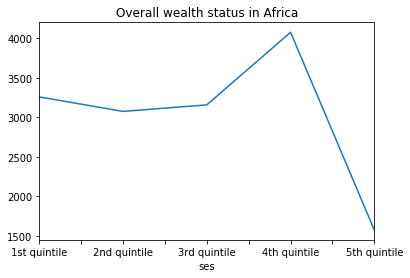

In [0]:
lifestyle.groupby(['ses'])['id'].count().plot( title = 'Overall wealth status in Africa')

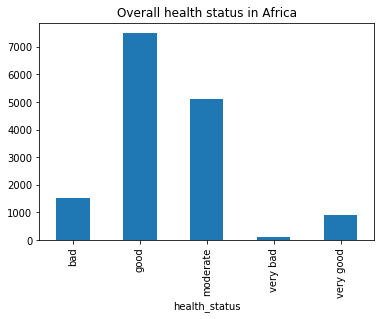

In [0]:
lifestyle.groupby(['health_status'])['id'].count().plot(kind = 'bar', title = 'Overall health status in Africa')